<a href="https://colab.research.google.com/github/playanaC/Skeleton_prediction/blob/main/Simulator_image_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install** libraries

In [1]:
!apt-get install swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,343 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 155653 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpa

Clone github

In [2]:
! git clone https://github.com/playanaC/Skeleton_prediction.git

Cloning into 'Skeleton_prediction'...
remote: Enumerating objects: 881, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (253/253), done.
remote: Total 881 (delta 34), reused 182 (delta 0), pack-reused 627
Receiving objects: 100% (881/881), 290.20 MiB | 22.21 MiB/s, done.
Resolving deltas: 100% (95/95), done.
Checking out files: 100% (762/762), done.


Extract neural network model

In [18]:
%cd /content/Skeleton_prediction/Model/
! cat model_pth.tar.bz.* > model_pth.tar.bz
! tar -xvjf model_pth.tar.bz

/content/Skeleton_prediction/Model
model.pth


In [35]:
import torch
from model import Model_AL

in_size = 100
net = Model_AL(n_seq=2, in_size=in_size, hidden_size=256, batch_size=1, n_channels=1, n_classes=1, bilinear=True)
model_total_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print('Total parameters count:', model_total_params)

Total parameters count: 78756737


<All keys matched successfully>

Find opencv folder

In [21]:
!pkg-config --cflags --libs opencv

-I/usr/include/opencv -lopencv_shape -lopencv_stitching -lopencv_superres -lopencv_videostab -lopencv_aruco -lopencv_bgsegm -lopencv_bioinspired -lopencv_ccalib -lopencv_datasets -lopencv_dpm -lopencv_face -lopencv_freetype -lopencv_fuzzy -lopencv_hdf -lopencv_line_descriptor -lopencv_optflow -lopencv_video -lopencv_plot -lopencv_reg -lopencv_saliency -lopencv_stereo -lopencv_structured_light -lopencv_phase_unwrapping -lopencv_rgbd -lopencv_viz -lopencv_surface_matching -lopencv_text -lopencv_ximgproc -lopencv_calib3d -lopencv_features2d -lopencv_flann -lopencv_xobjdetect -lopencv_objdetect -lopencv_ml -lopencv_xphoto -lopencv_highgui -lopencv_videoio -lopencv_imgcodecs -lopencv_photo -lopencv_imgproc -lopencv_core


Update g++ compiler

In [6]:
!g++ -v

Using built-in specs.
COLLECT_GCC=g++
COLLECT_LTO_WRAPPER=/usr/lib/gcc/x86_64-linux-gnu/7/lto-wrapper
OFFLOAD_TARGET_NAMES=nvptx-none
OFFLOAD_TARGET_DEFAULT=1
Target: x86_64-linux-gnu
Configured with: ../src/configure -v --with-pkgversion='Ubuntu 7.5.0-3ubuntu1~18.04' --with-bugurl=file:///usr/share/doc/gcc-7/README.Bugs --enable-languages=c,ada,c++,go,brig,d,fortran,objc,obj-c++ --prefix=/usr --with-gcc-major-version-only --program-suffix=-7 --program-prefix=x86_64-linux-gnu- --enable-shared --enable-linker-build-id --libexecdir=/usr/lib --without-included-gettext --enable-threads=posix --libdir=/usr/lib --enable-nls --enable-bootstrap --enable-clocale=gnu --enable-libstdcxx-debug --enable-libstdcxx-time=yes --with-default-libstdcxx-abi=new --enable-gnu-unique-object --disable-vtable-verify --enable-libmpx --enable-plugin --enable-default-pie --with-system-zlib --with-target-system-zlib --enable-objc-gc=auto --enable-multiarch --disable-werror --with-arch-32=i686 --with-abi=m64 --with

In [7]:
!apt install g++-9
!update-alternatives --remove-all gcc 
!update-alternatives --remove-all g++

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-9 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-9 20

!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc

!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'python-clang-9' for regex 'g++-9'
Note, selecting 'clang-9' for regex 'g++-9'
Note, selecting 'clang-9-examples' for regex 'g++-9'
Note, selecting 'libclang-9-dev' for regex 'g++-9'
Note, selecting 'clang-9-doc' for regex 'g++-9'
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  binfmt-support fonts-mathjax libclang-common-9-dev libclang-cpp9 libclang1-9
  libffi-dev libjs-mathjax libllvm9 libomp-9-dev libomp5-9 libpfm4 llvm-9
  llvm-9-dev llvm-9-runtime llvm-9-tools python-chardet python-pkg-resources
  python-pygments python-yaml python3-pkg-resources python3-pygments
  python3-yaml
Suggested packages:
  fonts-mathjax-extras fonts-stix libjs-mathjax-doc libomp-9-doc llvm-9-doc
  python-setuptools ttf-bitstream-vera python3-setuptools
T

Compile files SWIG

In [22]:
!swig -I/content/Skeleton_prediction/Simulator_image/opencv-swig-master/lib -I/usr/include/ -w972 -c++ -python /content/Skeleton_prediction/Simulator_image/Simulator.i
!swig -I/content/Skeleton_prediction/Simulator_image/opencv-swig-master/lib -I/usr/include/ -w972 -c++ -python /content/Skeleton_prediction/Simulator_image/Create_image.i

Compile files C++

In [23]:
!g++ -shared -fpic /content/Skeleton_prediction/Simulator_image/Simulator_wrap.cxx $(pkg-config --cflags --libs python3) $(pkg-config --cflags --libs opencv) -o /content/Skeleton_prediction/Simulator_image/_Simulator.so
!g++ -shared -fpic /content/Skeleton_prediction/Simulator_image/Create_image_wrap.cxx $(pkg-config --cflags --libs python3) $(pkg-config --cflags --libs opencv) -o /content/Skeleton_prediction/Simulator_image/_Create_image.so

Show all files (hide files)

In [24]:
!ls /content/Skeleton_prediction/Simulator_image/ -al

total 23804
drwxr-xr-x 7 root root    4096 Jul 18 09:20 .
drwxr-xr-x 5 root root    4096 Jul 18 09:00 ..
drwxr-xr-x 2 root root    4096 Jul 18 09:00 backgrounds
-rw-r--r-- 1 root root    5418 Jul 18 09:00 Create_image.hpp
-rw-r--r-- 1 root root     327 Jul 18 09:00 Create_image.i
-rw-r--r-- 1 root root  484944 Jul 18 09:19 Create_image.py
-rwxr-xr-x 1 root root 5965400 Jul 18 09:20 _Create_image.so
-rw-r--r-- 1 root root 5567925 Jul 18 09:19 Create_image_wrap.cxx
drwxr-xr-x 3 root root    4096 Jul 18 09:06 Data
-rw-r--r-- 1 root root       0 Jul 18 09:16 model_pth.tar.bz
drwxr-xr-x 5 root root    4096 Jul 18 09:00 opencv-swig-master
drwxr-xr-x 2 root root    4096 Jul 18 09:07 __pycache__
-rw-r--r-- 1 root root   29346 Jul 18 09:00 Simulator.hpp
-rw-r--r-- 1 root root     560 Jul 18 09:00 Simulator.i
-rw-r--r-- 1 root root  478187 Jul 18 09:19 Simulator.py
-rwxr-xr-x 1 root root 6129816 Jul 18 09:19 _Simulator.so
-rw-r--r-- 1 root root 5619543 Jul 18 09:19 Simulator_wrap.cxx
drwxr-xr-x 

Create PTS files

In [25]:
import os
import sys
import time
import random
import sys
sys.path.append('/content/Skeleton_prediction/Simulator_image')

import ctypes
ctypes.cdll.LoadLibrary('/content/Skeleton_prediction/Simulator_image/_Simulator.so')
import Simulator


# Input variables
total_image = 30
worms = 2
parall = 0
coll = 2
velocity = 1
day_init_exp = 6
img_agg = 6

path_tracks = '/content/Skeleton_prediction/Simulator_image' + '/tracks/'
path_backgrounds = '/content/Skeleton_prediction/Simulator_image' + '/backgrounds/'
fold_exp_sim = '/content/Skeleton_prediction/Simulator_image' + '/Data/'

if not os.path.exists(fold_exp_sim):
    os.makedirs(fold_exp_sim)

start = time.perf_counter()
Simulator.Simulate(path_tracks, path_backgrounds, fold_exp_sim, worms, parall, coll, velocity, day_init_exp, total_image)
end = time.perf_counter()
time_fn = (end - start)


newSubFolderF = fold_exp_sim + 'day = ' + str(day_init_exp) + ' cond = X pla = 1 living_worms = ' + str(worms) + '/'
print(newSubFolderF)
print("Time measured (worms=",worms,", images=",total_image,"):", time_fn*1000, "[ms]")

/content/Skeleton_prediction/Simulator_image/Data/day = 6 cond = X pla = 1 living_worms = 2/
Time measured (worms= 2 , images= 30 ): 35.225018999881286 [ms]


Create and show image

Time measured: 35.32887900018977 [ms]


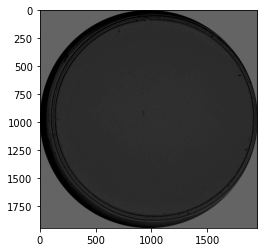

In [26]:
import cv2
import time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

import sys
sys.path.append('/content/Skeleton_prediction/Simulator_image')

import ctypes
ctypes.cdll.LoadLibrary('/content/Skeleton_prediction/Simulator_image/_Create_image.so')
import Create_image

path_data = newSubFolderF + 'RASP06_000029.pts'

path_background_data = newSubFolderF + '/background'
file = open(path_background_data, 'r')
data = file.read()
background_name = data.split(',')[0]
path_background = path_backgrounds + background_name

# Gray image low resolution
start = time.perf_counter()
Mat_img = Create_image.create_image(path_data,path_background)
img = np.asarray(Mat_img)[:, :, 0]
img = cv2.blur(img, (3, 3))
end = time.perf_counter()
time_cpp = end - start

print("Time measured:", time_cpp*1000, "[ms]")

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

Functions to get skeletons

In [40]:
import math

def build_skel_fill(H, W, XY_skels, D):
    mask = np.zeros((H, W), dtype=np.uint8)
    for XY_skel in XY_skels:
        for XY in XY_skel:
            # mask[XY[0], XY[1]] = 1
            center_coordinates = (XY[0], XY[1])
            mask = cv2.circle(mask, center_coordinates, D, 255, -1)
            # plt.imshow(mask)
            # plt.show()
    return mask.astype(np.uint8)
    

def build_skel(H, W, XY_skels, file_type):
    mask = np.zeros((H, W), dtype=np.uint8)
    for XY_skel in XY_skels:
        for XY in XY_skel:
            if file_type == 'pts':
                mask[XY[0], XY[1]] = 1
            else:
                mask[XY[1], XY[0]] = 1
    return mask.astype(np.uint8)


def get_skeletons(path_data):
    file = open(path_data, 'r')
    skel = []
    for line in file:
        data = line.split('P')

        if len(data) == 2:
            XY_list_str = data[1].split(";")
            X = []
            Y = []
            for XY_p in XY_list_str:
                XY_list = XY_p.split()
                X.append(int(XY_list[0]))
                Y.append(int(XY_list[1]))

            points = np.transpose(np.vstack([Y, X]))
            skel.append(points)

    return skel

def new_HW_cr(r0, c0, r1, c1, h_max, w_max, h_max_im, w_max_im):
    dH = int(math.ceil((h_max - abs(c1 - c0)) / 2))
    if abs(c1 - c0) < h_max:
        c0_N = c0 - dH
    else:
        c0_N = c0
    c1_N = c0_N + h_max

    dW = int(math.ceil((w_max - abs(r1 - r0)) / 2))
    if abs(r1 - r0) < w_max:
        r0_N = r0 - dW
    else:
        r0_N = r0
    r1_N = r0_N + w_max

    if c1_N >= h_max_im:
        dh_out = h_max_im - c1_N + 1
        c1_N = c1_N - dh_out
        c0_N = c0_N - dh_out

    if c0_N <= 0:
        dh_out = abs(c0_N) + 1
        c1_N = c1_N + dh_out
        c0_N = c0_N + dh_out

    if r1_N >= w_max_im:
        dw_out = w_max_im - r1_N + 1
        r1_N = r1_N - dw_out
        r0_N = r0_N - dw_out

    if r0_N <= 0:
        dw_out = abs(r0_N) + 1
        r1_N = r1_N + dw_out
        r0_N = r0_N + dw_out

    return r0_N, c0_N, r1_N, c1_N


def get_background_data(background_folder):
    path_background_data = background_folder + "/background"
    file = open(path_background_data, 'r')
    data = file.read()
    background_name = data.split(',')[0]
    return background_name


  
def IMGS_SKL(base_img, pts_file1, pts_file2, path_background, Nworm, in_size):

  background_name = get_background_data(base_img)
  background_path = path_background + background_name

  path_pts1 = base_img + pts_file1
  path_pts2 = base_img + pts_file2

  img1 = Create_image.create_image(path_pts1, background_path)
  img1 = np.asarray(img1)[:, :, 0]
  img2 = Create_image.create_image(path_pts2, background_path)
  img2 = np.asarray(img2)[:, :, 0]

  skl_list = get_skeletons(path_pts1)
  SKL1 = build_skel(1944, 1944, [skl_list[Nworm]], 'pts')
  label_img = label((SKL1 * 255).astype('uint8'))
  regions = regionprops(label_img)
  r0, c0, r1, c1 = regions[0].bbox
  r0_N, c0_N, r1_N, c1_N = new_HW_cr(c0, r0, c1, r1, in_size, in_size, 1944, 1944)
  # r0_N, c0_N, r1_N, c1_N = new_HW_cr(r0, c0, r1, c1, in_size, in_size, 1944, 1944)

  skl_list = get_skeletons(path_pts2)
  SKL2 = build_skel(1944, 1944, [skl_list[Nworm]], 'pts')

  img1 = cv2.blur(img1[c0_N:c1_N, r0_N:r1_N], (3, 3))
  img2 = cv2.blur(img2[c0_N:c1_N, r0_N:r1_N], (3, 3))
  SKL1 = SKL1[c0_N:c1_N, r0_N:r1_N]
  SKL2 = SKL2[c0_N:c1_N, r0_N:r1_N]

  return img1, img2, SKL1, SKL2

Show images (input/output network)

     Input1  -  Input2  -  Input3   - True-mask


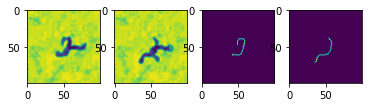

In [66]:
base_img = newSubFolderF

pts_file1 = 'RASP06_000001.pts'
pts_file2 = 'RASP06_000002.pts'
Nworm = 0
img1, img2, SKL1, SKL2 = IMGS_SKL(base_img, pts_file1, pts_file2, path_backgrounds, Nworm, in_size)

print('     Input1  -  Input2  -  Input3   - True-mask')
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4)
ax0.imshow(img1)
ax1.imshow(img2)
ax2.imshow(SKL1)
ax3.imshow(SKL2)
plt.show()

Get network's prediction 

cuda


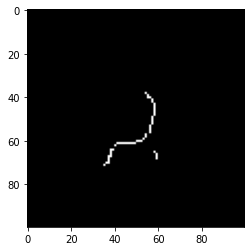

In [47]:
path_net_eval = '/content/Skeleton_prediction/Model/model.pth'
net.load_state_dict(torch.load(path_net_eval))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

imgs = np.zeros((in_size, in_size, 2), dtype=np.uint8)
imgs[:, :, 0] = img1
imgs[:, :, 1] = img2

imgs = torch.from_numpy(imgs).type(torch.FloatTensor).unsqueeze(0)
Pmasks = torch.from_numpy(SKL1).type(torch.FloatTensor).unsqueeze(0)
true_masks = torch.from_numpy(SKL2).type(torch.FloatTensor).unsqueeze(0)

imgs = imgs.to(device=device, dtype=torch.float32)
Pmasks = Pmasks.to(device=device, dtype=torch.float32)
mask_type = torch.float32 if net.n_classes == 1 else torch.long
true_masks = true_masks.to(device=device, dtype=mask_type)

net.eval()
net.to(device=device)
with torch.no_grad():
    predict_mask = net(imgs.permute(0, 3, 1, 2), Pmasks.unsqueeze(0))

pred = torch.sigmoid(predict_mask)
pred = (pred > 0.5).float()

pred = pred.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow((pred*255).astype('uint8'), cmap='gray', vmin=0, vmax=255)
plt.show()

Show image (compare)

      Input1  -  Input2 -   Input3  -  Output
       Img1   -   Img2  - SKL(worm1) - Network_prediction


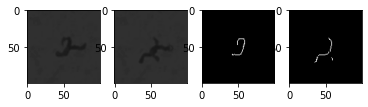

        true_mask     -     Network_prediction


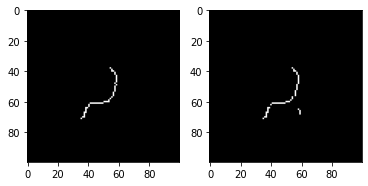

In [63]:
print('      Input1  -  Input2 -   Input3   -    Output')
print('       Img1   -   Img2  - SKL(worm1) - Network_prediction')
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4)
ax0.imshow(img1, cmap='gray', vmin=0, vmax=255)
ax1.imshow(img2, cmap='gray', vmin=0, vmax=255)
ax2.imshow(SKL1*255, cmap='gray', vmin=0, vmax=255)
ax3.imshow(pred*255, cmap='gray', vmin=0, vmax=255)
plt.show()

print('        true_mask     -     Network_prediction')
f, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(img1, cmap='gray', vmin=0, vmax=255)
ax1.imshow(img2, cmap='gray', vmin=0, vmax=255)
ax0.imshow(SKL2*255, cmap='gray', vmin=0, vmax=255)
ax1.imshow(pred*255, cmap='gray', vmin=0, vmax=255)
plt.show()